In [56]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from alpha_vantage.timeseries import TimeSeries
import csv
from datetime import date
import numpy as np
today = date.today()
api_key = '5ARDL6TBQ804YOEZ'

In [57]:
# List of Companies Sector Wise 
list_of_companies = {
    "AI" : ["TATAELXSI.NS", "KELLTONTEC.NS", "ZENSARTECH.NS", "SAKSOFT.NS", "AFFLE.NS", "CYIENT.NS","PERSISTENT.NS"],
    "RCPS" : ["NAUKRI.NS","BHARATFORG.NS","PARAS.NS","RTNINDIA.NS","DCMSHRIRAM.NS","HAL.NS","RELIANCE.NS"],
    "BSE":["BIOCON.NS","SYNGENE.NS","DIVISLAB.NS","AUROPHARMA.NS","DRREDDY.NS","SUNPHARMA.NS","CIPLA.NS","AJANTPHARM.NS","LAURUSLABS.NS","NATCOPHARM.NS","APLLTD.NS","SUVENPHAR.NS"],
    "DSEB" : ["TANLA.NS","CDSL.NS","ONMOBILE.NS","CAMS.NS","AGSTRA.NS"]
}

start_date = "2021-01-01"
end_date = today


In [58]:
def extract_data(key):
    comp = list_of_companies[key]
    data = yf.download(comp, start=start_date, end=end_date)
    data.rename(columns=lambda x: 'Date' if 'Unnamed' in x else x, inplace=True)
    new_df = pd.DataFrame()
    column_types = ['Adj Close', 'Open', 'Close', 'Volume', 'High', 'Low']
    level_index = 0  # or 1, depending on which level of the MultiIndex contains the column names

    # Loop through each column type and aggregate the data
    for column_type in column_types:
        # Select columns that contain the current column type in the specified MultiIndex level
        selected_columns = [col for col in data.columns.get_level_values(level_index) if column_type in col]

        # Check if there are columns to aggregate
        if selected_columns:
            # Create a mask for selected columns in the MultiIndex
            column_mask = data.columns.get_level_values(level_index).isin(selected_columns)

            # Aggregate the columns and assign to new DataFrame
            new_df[f'Aggregate_{column_type}'] = data.loc[:, column_mask].sum(axis=1)
    new_df.to_csv(f'{key}_agg.csv')

In [59]:
def extract_all_companies():
    for key in list_of_companies.keys():
        extract_data(key)

In [60]:
extract_all_companies()

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  5 of 5 completed


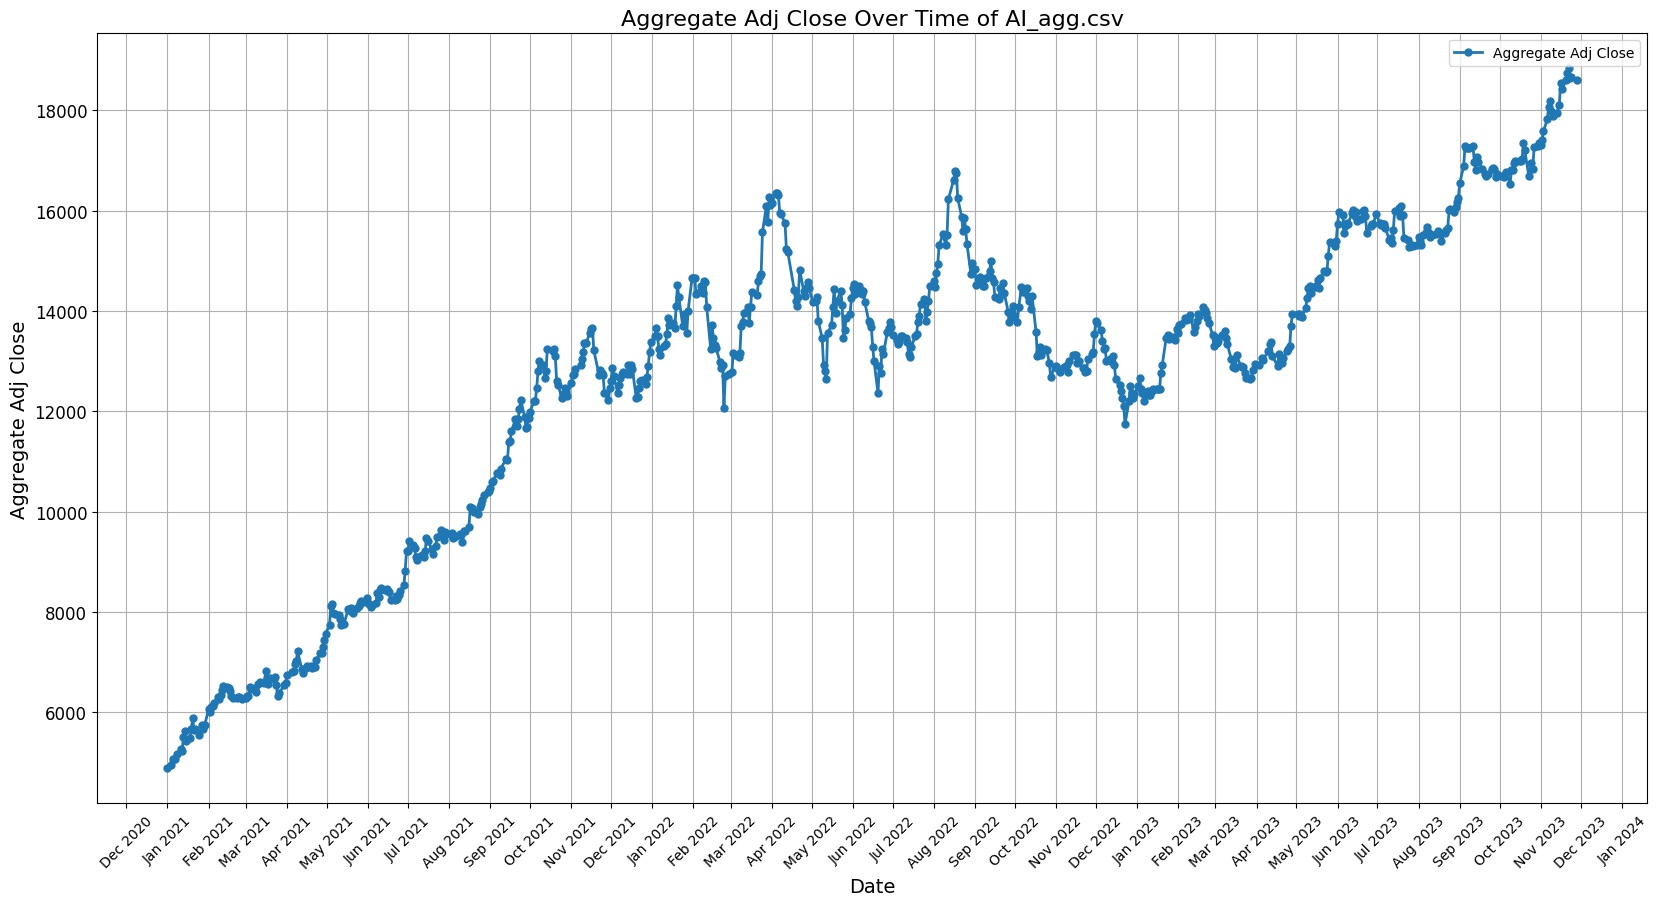

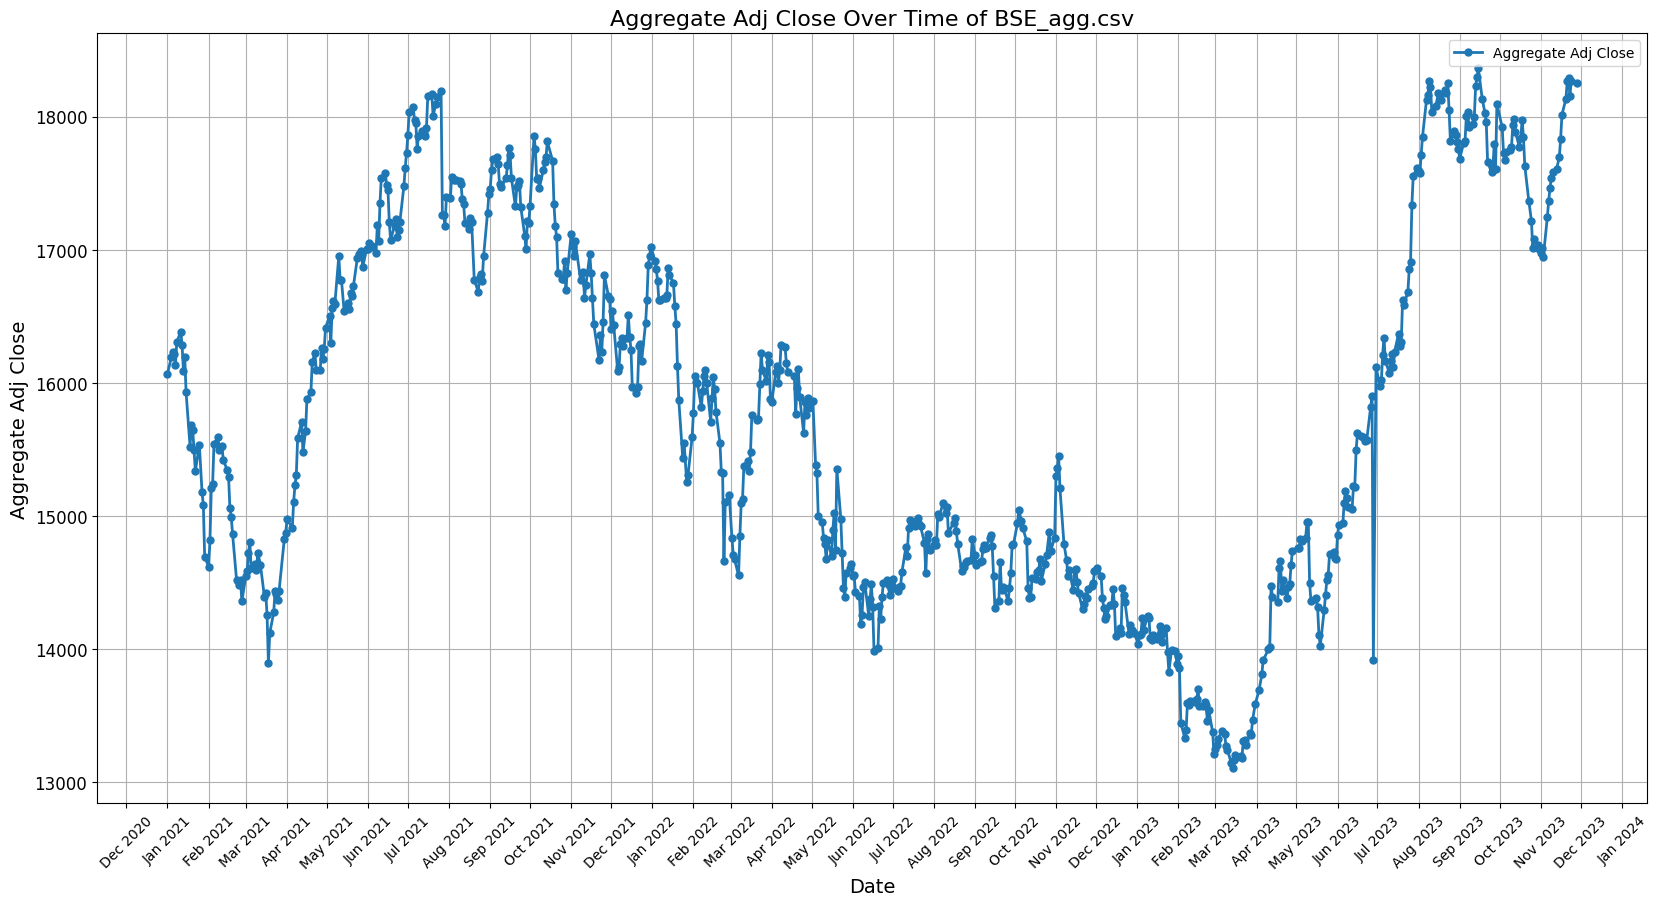

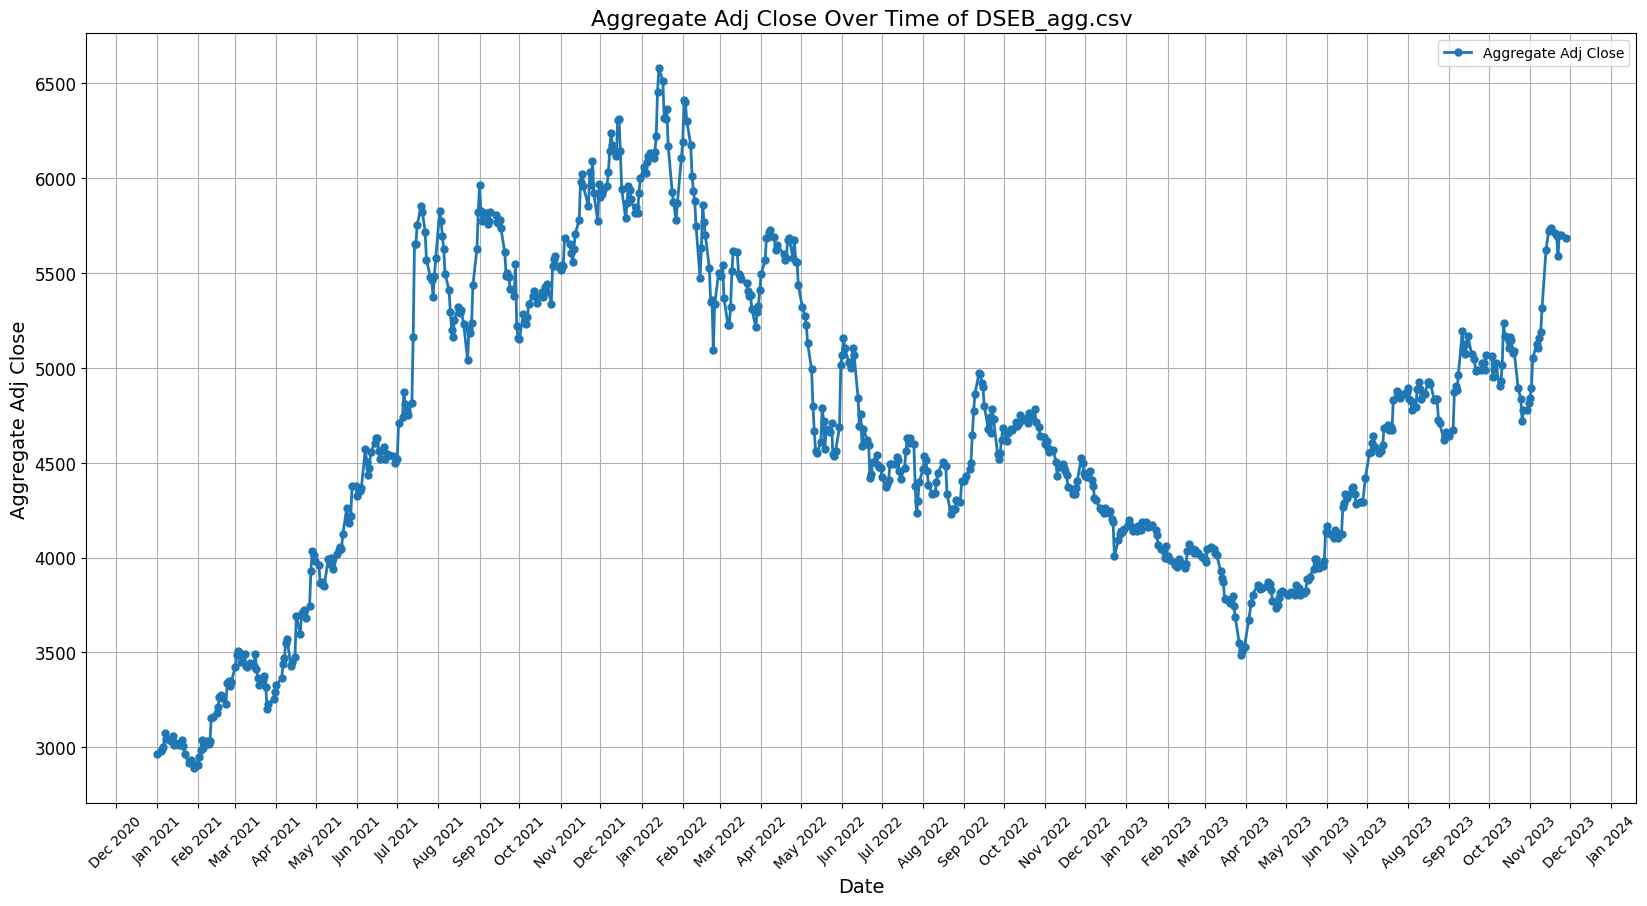

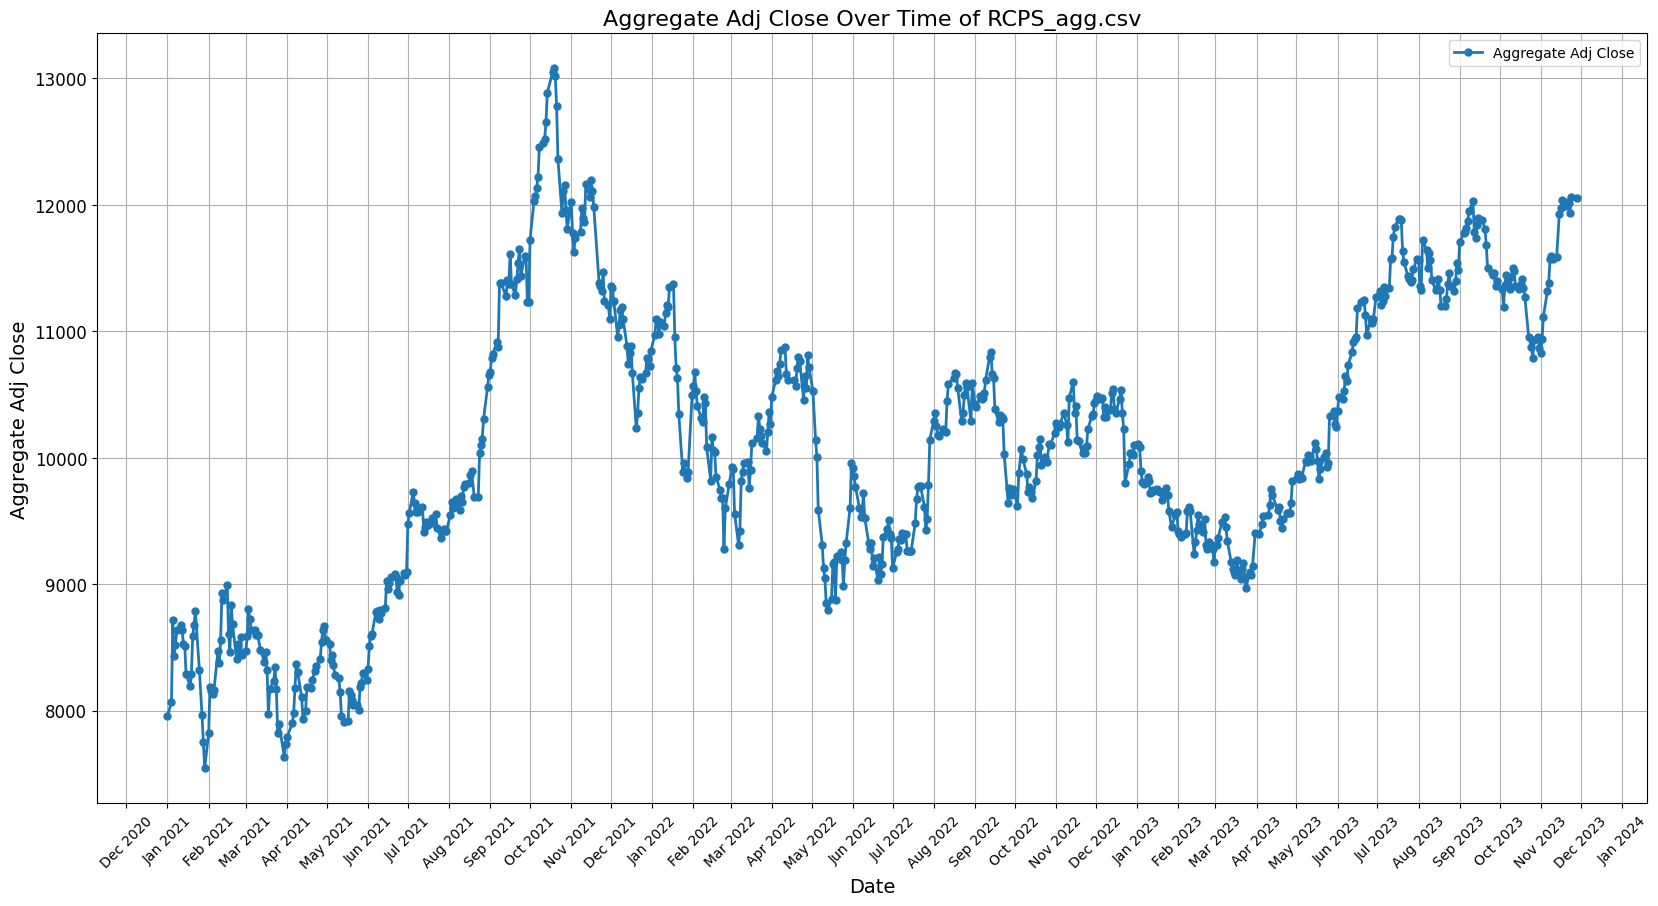

In [63]:
#Plotting the graph for each sector:
def plot_index_with_months(filename):
    df = pd.read_csv(filename)
    plt.figure(figsize=(20, 10))
    df['Date'] = pd.to_datetime(df['Date'])
    plt.plot(df['Date'], df['Aggregate_Adj Close'], label='Aggregate Adj Close', linewidth=2, marker='o', markersize=5)
    
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Aggregate Adj Close', fontsize=14)
    plt.title(f'Aggregate Adj Close Over Time of {filename}', fontsize=16)
    
    # Format x-axis to show labels as "Mon YYYY"
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=12)
    
    plt.legend()
    plt.grid(True)
    plt.show()
plot_index_with_months('AI_agg.csv')
plot_index_with_months('BSE_agg.csv')
plot_index_with_months('DSEB_agg.csv')
plot_index_with_months('RCPS_agg.csv')


# Stock Market Prediction



In [83]:
#Importing Necessary Libraries
import pandas as PD
import numpy as np
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras.optimizers import Adam
from keras. models import load_model
from keras. layers import LSTM
from tensorflow.keras.utils import plot_model

In [84]:
df = pd.read_csv('AI_agg.csv')
#Set Target Variable
output_var = PD.DataFrame(df['Aggregate_Adj Close'])
#Selecting the Features
features = ['Aggregate_Open', 'Aggregate_High', 'Aggregate_Low', 'Aggregate_Volume']

In [85]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Aggregate_Open,Aggregate_High,Aggregate_Low,Aggregate_Volume
0,0.000000,0.000000,0.000000,0.056808
1,0.003639,0.003609,0.004611,0.105116
2,0.007468,0.014323,0.007667,0.179405
3,0.019351,0.018732,0.012445,0.091321
4,0.018944,0.018079,0.016301,0.206860


In [86]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [87]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [111]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 32)                4736      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4769 (18.63 KB)
Trainable params: 4769 (18.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
history=lstm.fit(X_train, y_train, epochs=10000, batch_size=20, verbose=1, shuffle=False)


Epoch 1/10000
33/33 [==============================] - 0s 841us/step - loss: 105160752.0000
Epoch 2/10000
33/33 [==============================] - 0s 1ms/step - loss: 104834272.0000
Epoch 3/10000
33/33 [==============================] - 0s 767us/step - loss: 104509320.0000
Epoch 4/10000
33/33 [==============================] - 0s 716us/step - loss: 104184064.0000
Epoch 5/10000
33/33 [==============================] - 0s 718us/step - loss: 103858344.0000
Epoch 6/10000
33/33 [==============================] - 0s 702us/step - loss: 103532240.0000
Epoch 7/10000
33/33 [==============================] - 0s 684us/step - loss: 103205736.0000
Epoch 8/10000
33/33 [==============================] - 0s 677us/step - loss: 102878840.0000
Epoch 9/10000
33/33 [==============================] - 0s 693us/step - loss: 102551544.0000
Epoch 10/10000
33/33 [==============================] - 0s 716us/step - loss: 102223880.0000
Epoch 11/10000
33/33 [==============================] - 0s 716us/step - loss: 101

In [116]:
y_pred= lstm.predict(X_test)

3/3 [==============================] - 0s 1ms/step


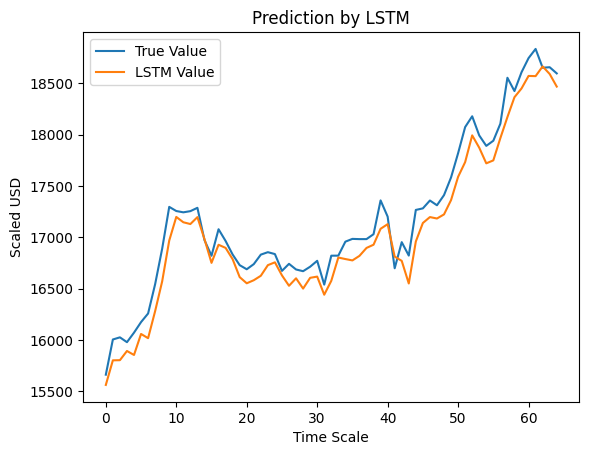

In [117]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()